# Predicting Employee Productivity Using Tree Models

<p style="text-align:center;">
  <img src="https://images.unsplash.com/photo-1522199670076-2852f80289c3?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=872&q=80" width="800" height="100">
  <br>
  Source: <a href="https://unsplash.com/">Unsplash</a>
</p>


In this project, we will be acquainting ourselves with the remarkable dataset, "Productivity Prediction of Garment Employees," which offers valuable insights into the garment industry's productivity performance. This dataset is a valuable resource, sourced from the prestigious [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees), renowned for its high-quality datasets. Below is a description of the dataset, according to its official summary:

> "*The garment industry is one of the key examples of the industrial globalization of the modern era.
It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.
So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.*"

<p style="text-align:center;">
  <img src="https://s3.amazonaws.com/dq-content/755/garment-factory-unsplash.jpg" width="800" height="100">
  <br>
  Source: <a href="https://www.dataquest.io/">DataQuest</a>
</p>

What makes this dataset particularly fascinating is its versatility, as it can be utilized with both regression and classification algorithms, as stated in the official summary's final sentence:

> "*This dataset can be used for regression purposes by predicting the productivity range (0-1) or for classification purposes by transforming the productivity range (0-1) into different classes.*"

While this dataset's versatility allows us to analyze it using a variety of different methods and techniques, in this project, we will be concentrating on utilizing a classification tree. By focusing on this method, we aim to gain valuable insights into the productivity performance of garment employees and improve our understanding of the garment industry's manufacturing processes.

## Import Libraries and Load Data

To get started, we will import the necessary libraries and load the "Productivity Prediction of Garment Employees" dataset into a DataFrame, enabling us to manipulate and analyze the data effectively.

In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [249]:
# Load the dataset
df = pd.read_csv('garments_worker_productivity.csv')

# View result
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Data Exploration Overview

As with any other dataset, determining what each column is telling us is a fundamental part of the exploration. The following is the dataset's official column information:

- `date`: date in MM-DD-YYYY
- `quarter`: a portion of the month — month was divided into four quarters
- `department`: associated department with the instance
- `day`: day of the week
- `team`: associated team number with the instance
- `targeted_productivity`: targeted productivity set by the authority for each team for each day
- `smv`: standard minute value — the allocated time for a task
- `wip`: work in progress — includes the number of unfinished items for products
- `over_time`: represents the amount of overtime by each team in minutes
- `incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
- `idle_time`: the duration of time when the production was interrupted due to several reasons
- `idle_men`: the number of workers who were idle due to production interruption
- `no_of_style_change`: number of changes in the style of a particular product
- `no_of_workers`: number of workers on each team
- `actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

In our next steps, we will explore the columns in the `df` dataset. First, we will identify the type of data included in each column and check for missing or incorrect values. To get a better understanding of each column's distribution, we will calculate the count of observations for each unique value. Then, we will compare relevant columns with each other, such as `targeted_productivity` vs. `actual_productivity`. By analyzing the relationships between these columns, we can gain insights into how the actual productivity relates to the targeted productivity and make data-driven decisions.

To begin, let's obtain the shape of the dataset, where the first value represents the number of observations, and the second value represents the number of columns.

In [250]:
df.shape

(1197, 15)

Next, we will take a closer look at the columns by examining their non-null observation counts and respective data types (dtypes). It's important to keep in mind that in pandas, an "object" dtype indicates that the column's observations are treated as strings or text.

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

The output of `df.info()` provides useful information about the dataset, such as the number of entries (in this case, 1197), the total number of columns (15), and the name, count, and data type of each column. It shows that there are 4 columns with an object data type, indicating that the observations of these columns are treated as strings/text. Additionally, it shows that the `wip` column has missing values, as indicated by the difference in the number of non-null counts across columns. This information is crucial to understanding the structure and characteristics of the dataset.

Let's gather some general statistics on the numerical columns. It's important to keep in mind that std refers to Standard Deviation, while the percentiles represent the range in which a certain percentage of the data falls. The minimum and maximum values of each column are also displayed, which can be helpful in identifying any outliers present in the dataset.

In [252]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


From the summary statistics table, we can observe the following:

- `team`: The average team number is 6.4, with a minimum of 1 and a maximum of 12.
- `targeted_productivity`: The mean targeted productivity is 0.73, with a minimum of 0.07 and a maximum of 0.8.
- `smv`: The average standard minute value is 15.06, with a minimum of 2.9 and a maximum of 54.56.
- `wip`: The average work in progress is 1190.47, with a minimum of 7 and a maximum of 23122.
- `over_time`: The average overtime is 4567.46, with a minimum of 0 and a maximum of 25920.
- `incentive`: The average incentive is 38.21, with a minimum of 0 and a maximum of 3600.
- `idle_time`: The average idle time is 0.73, with a minimum of 0 and a maximum of 300.
- `idle_men`: The average number of idle men is 0.37, with a minimum of 0 and a maximum of 45.
- `no_of_style_change`: The average number of style changes is 0.15, with a minimum of 0 and a maximum of 2.
- `no_of_workers`: The average number of workers is 34.61, with a minimum of 2 and a maximum of 89.
- `actual_productivity`: The average actual productivity is 0.74, with a minimum of 0.23 and a maximum of 1.12.

By examining the table, we can discover several interesting facts about the dataset. For example:

- There are missing values in the `wip` column, as the count for that column is only 691 instead of 1197.
- There are some columns such as `wip`, `over_time`, `incentive`, `idle_time`, `idle_men`, and `no_of_workers` with a maximum value that is much higher than the 75th percentile, indicating the presence of outliers in the dataset.
- The range of values for each column varies widely, indicating the need for scaling or normalization as we plan to use these features to build our model.

We see that the targeted productivity has a relatively small range, suggesting that there may be strict targets for productivity that the factory is trying to meet. The average overtime is quite high, which may indicate that the factory is having trouble meeting its production targets within regular working hours. The number of workers ranges from 2 to 89, suggesting that there may be some variability in the workforce size depending on production needs.

The statistics related to idle time and idle men are particularly interesting, as they suggest that there may be some issues with productivity in the factory. The fact that the average idle time is relatively low, but there is still a maximum of 300 minutes of idle time, suggests that there may be some production stoppages or other issues that are causing lost time. Similarly, the fact that there is a maximum of 45 idle men suggests that there may be some inefficiencies in the workforce or production process.

Thus far, we have analyzed the relationships between columns in our dataset. However, we must now take a closer look at each column independently. Our first step is to determine the data type included in each column and check for any missing or incorrect values. After identifying and addressing any issues, we will compute the count of observations for each unique value to gain a better understanding of the distribution of each column. Additionally, we will compare relevant columns, such as targeted_productivity vs. actual_productivity, to explore how the actual productivity relates to the targeted productivity. By examining these relationships, we can gather valuable insights and make data-driven decisions.

### Find Data Types

`df.dtypes` is a useful attribute in pandas that displays the data type of each column in a DataFrame.

In [253]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

The `df.dtypes` output shows the data type of each column in the `df` dataframe. The columns `date`, `quarter`, `department`, and `day` are of object type, which typically indicates they contain string values. The columns `targeted_productivity`, `smv`, `wip`, `idle_time`, `no_of_workers`, and `actual_productivity` are of float type, meaning they contain decimal values. The columns `team`, `over_time`, `incentive`, `idle_men`, and `no_of_style_change` are of integer type.

### Find Missing Values

Next, we will determine if there are any missing values in any of these columns.

In [254]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

As we mentioned earlier, the column `wip` has 506 missing values, while all other columns seem to have complete data with no missing values.

### Calculate Unique Values

Next, we will calculate the count of observations for each unique value within each column.

In [255]:
# Calculate frequency distribution every column in the data
for col in df.columns:
    print(f'--- Unique values for {col} ---')
    display(df[col].value_counts())
    print()

--- Unique values for date ---


3/11/2015    24
1/31/2015    24
1/11/2015    23
3/10/2015    23
1/12/2015    23
1/24/2015    23
1/8/2015     22
1/10/2015    22
1/7/2015     22
1/13/2015    22
1/5/2015     22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/22/2015    22
2/25/2015    21
2/26/2015    21
2/28/2015    21
1/3/2015     21
1/4/2015     21
1/28/2015    21
1/27/2015    21
3/4/2015     21
1/25/2015    21
1/17/2015    21
1/14/2015    21
1/6/2015     21
2/18/2015    21
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/19/2015    20
3/5/2015     19
3/7/2015     19
2/24/2015    19
2/23/2015    19
1/1/2015     19
2/3/2015     19
2/15/2015    19
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
1/26/2015    19
2/1/2015     19
2/2/2015     19
2/4/2015     19
2/7/2015     19
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: date, dtype: int64


--- Unique values for quarter ---


Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64


--- Unique values for department ---


sweing        691
finishing     257
finishing     249
Name: department, dtype: int64


--- Unique values for day ---


Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64


--- Unique values for team ---


8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64


--- Unique values for targeted_productivity ---


0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64


--- Unique values for smv ---


3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: smv, Length: 70, dtype: int64


--- Unique values for wip ---


1039.0    5
1282.0    4
1263.0    3
1216.0    3
1069.0    3
         ..
1635.0    1
1519.0    1
1337.0    1
1118.0    1
914.0     1
Name: wip, Length: 548, dtype: int64


--- Unique values for over_time ---


960      129
1440     111
6960      61
6840      48
1200      39
        ... 
4140       1
12180      1
10770      1
12000      1
3120       1
Name: over_time, Length: 143, dtype: int64


--- Unique values for incentive ---


0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
100       7
55        7
81        7
69        6
65        6
70        6
35        5
960       5
94        4
44        4
90        3
24        2
27        2
49        2
119       2
46        2
1080      1
1440      1
2880      1
3600      1
32        1
1200      1
62        1
98        1
33        1
138       1
93        1
53        1
29        1
21        1
37        1
54        1
25        1
Name: incentive, dtype: int64


--- Unique values for idle_time ---


0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64


--- Unique values for idle_men ---


0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64


--- Unique values for no_of_style_change ---


0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64


--- Unique values for no_of_workers ---


8.0     262
58.0    114
57.0    109
59.0     75
10.0     60
       ... 
51.5      1
28.0      1
21.0      1
4.0       1
6.0       1
Name: no_of_workers, Length: 61, dtype: int64


--- Unique values for actual_productivity ---


0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: actual_productivity, Length: 879, dtype: int64

Looking at the count distribution, we notice that some columns have unexpected representations, such as `quarter`, `department`, and `day`. We will investigate these columns further to determine the cause of the inconsistency.

#### "date" Column

Finding the first and last five rows of the `date` column can provide insights into the time range of the data, including the duration of the data available.

In [256]:
display(df['date'].head())
display(df['date'].tail())

0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: date, dtype: object

1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, dtype: object

Based on the output above, we can observe that the `date` column contains data from January 1st to March 11th. Additionally, selecting a random subset of observations can provide us with a general understanding of the data in the column.

In [257]:
df['date'].sample(20)

193     1/12/2015
821     2/17/2015
663      2/8/2015
711     2/11/2015
749     2/14/2015
740     2/12/2015
674      2/9/2015
246     1/14/2015
48       1/4/2015
765     2/14/2015
585      2/3/2015
397     1/24/2015
1023     3/2/2015
390     1/22/2015
727     2/11/2015
88       1/6/2015
443     1/26/2015
314     1/18/2015
605      2/4/2015
504     1/29/2015
Name: date, dtype: object

#### "quarter" Column

The column title `quarter` may cause some confusion since it typically refers to a part of a year, but in this case, it represents a part of a month. To gain a better understanding of the distribution of data in this column, let's use the `value_counts()` method again and see the number of observations per week.

In [258]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

Interestingly, there are 44 observations classified as "Quarter 5", which draws our attention. Now, let's explore these observations in detail and see if we can reveal any significant findings.

In [259]:
# Extract values of 'Quarter5'
df[df['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


We can observe that the "Quarter 5" classification is always associated with the `29th` and `31st` in the `date` column. This explains why we have 5 quarters instead of the usual 4 for the month of January.

####  "department" Column

Let's now shift our focus to the `department` column, which indicates the department associated with each instance.

In [260]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

The `department` column seems to have an issue - it has two distinct "finishing" values. Such occurrences are usually caused by whitespace in the observation content. To investigate this, we can use the `unique()` method to get all unique values of a column:

In [261]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

We observe that the 'finishing' value appears twice in this column, with one instance having a trailing space. This is a common issue caused by extra whitespace in the data. We will address this during the data cleaning step.

####  "day" Column

This column indicates the weekdays when the industry operates.

In [262]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

The absence of Friday observations doesn't necessarily imply missing data, as it's possible that the factory is closed on Fridays. Additionally, the `day` column supports the idea of `quarter` column that "Quarter 5" comprises observations on January 29th (Thrusday) and 31st (Saturday) of 2015, as confirmed by the [2015 calender](https://www.dayoftheweek.org/calendar/2015). Keeping track of such discoveries is crucial for future analysis.


#### "team" Column

We can concatenate methods to organize the value counts of the team numbers in ascending order. As a result, the left column represents the team number while the right column shows the number of observations associated with each team.

In [263]:
df['team'].value_counts().sort_index()

1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64

#### "targeted_productivity" & "actual_productivity" Columns

An effective strategy would be to examine these two columns in conjunction. We can begin by investigating the instances where the productivity exceeded the target productivity.

In [264]:
df[df['actual_productivity'] > df['targeted_productivity']]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


As we see, in approximately 72% of all observations, workers managed to surpass the target productivity threshold. Now let's focus on the observations where the actual productivity was exactly equal to the target productivity.

In [265]:
df[df['targeted_productivity'] == df['actual_productivity']]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
163,1/10/2015,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8
182,1/11/2015,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8
183,1/11/2015,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8
207,1/12/2015,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8
229,1/13/2015,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8
855,2/19/2015,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7


Only six observations where the actual productivity is exactly equal to the target productivity. As expected, this represents a small portion, around 1%, of the total dataset.

Moving on, let's explore the observations where the actual productivity failed to meet the target.

In [266]:
df[df['targeted_productivity'] > df['actual_productivity']]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
11,1/1/2015,Quarter1,sweing,Thursday,10,0.75,19.31,578.0,6480,45,0.0,0,0,54.0,0.712205
12,1/1/2015,Quarter1,sweing,Thursday,5,0.80,11.41,668.0,3660,50,0.0,0,0,30.5,0.707046
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
16,1/1/2015,Quarter1,finishing,Thursday,7,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Despite the productivity targets being exceeded in a majority of observations, there are still a significant number of instances where targets weren't met. In fact, these observations represent around ~25% of the total dataset.

To investigate further, we'll focus on the `actual_productivity` column and examine cases where the range exceeded the expected maximum value of 1.

In [267]:
df[df['actual_productivity'] > 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


In [268]:
df[df['actual_productivity'] > 1].shape[0]/len(df['actual_productivity'])* 100

3.091060985797828

We can observe that approximately 3% of the observations exceed the expected range for actual productivity. The fact that some observations have values greater than 1 in the `actual_productivity` column is surprising given that the official documents state that the value should range from 0 to 1. There could be several possible reasons for this, such as errors in data entry, measurement errors, or actual instances where the workers have exceeded the expected productivity levels by a significant amount.

#### "wip" Column

This column tracks the quantity of incomplete products. Additionally, it contains missing observations, which we can filter using the `notna()` method to analyze the observations that contain information.

In [269]:
df[df['wip'].notna()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


Alternatively, if we want to view the null or missing values, we can use the `isna()` method.

#### "over_time" Column

The `overtime` column captures the number of minutes of overtime worked by each team. As previously confirmed by using the `describe()` method, this column has a wide range of values. Let's take another look at the range to gain further insight.

In [270]:
df['over_time'].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

Based on these results, it could be useful to examine the observations where the overtime exceeds a certain threshold. For instance, we can use the value of the 50th percentile as a threshold:

In [271]:
df[df['over_time'] > 3960]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


As expected, nearly half of the observations feature significant overtime among teams. Now, let's move on to exploring the observations that do not include overtime.

In [272]:
df[df['over_time'] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


In [273]:
# Count number of observations without any overtime
len(df[df["over_time"] == 0])

31

Let's explore how many observations we have where the productivity standards were met without any overtime, considering we have only 31 such observations in total.

In [274]:
df[(df['over_time'] == 0) & (df['actual_productivity'] > df['targeted_productivity'])][['over_time', 'actual_productivity', 'targeted_productivity']]

,over_time,actual_productivity,targeted_productivity
684,0,0.750648,0.75
694,0,0.900632,0.80
695,0,0.900471,0.80
696,0,0.900471,0.80
697,0,0.899984,0.80
713,0,1.000345,0.80
714,0,1.000066,0.80
718,0,0.850365,0.80
730,0,1.100484,0.80
732,0,1.000345,0.80


In [275]:
# Count number of observations without overtime and increased actual productivity than targeted
len(df[(df['over_time'] == 0) & (df['actual_productivity'] > df['targeted_productivity'])])

24

Based on the output, there are 24 observations that the actual productivity was higher than the targeted productivity. The `actual_productivity` values range from 0.600983 to 1.100484, which suggests that some workers were able to exceed their productivity targets even without working overtime.


#### "incentive" Column

The `incentive` column contains data related to financial incentives that encourage a certain behavior or action. The `describe()` method provided the following summary statistics for this column:

In [276]:
df['incentive'].describe()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

The available data indicates that workers have few incentives. How many observations in the dataset do not include any kind of incentive?

In [277]:
len(df[df['incentive'] == 0])

604

The majority of the entire dataset, more than 50%, doesn't feature any kind of incentives. Additionally, incentives only appear from the 75th percentile onwards (although not necessarily exactly on the 75th percentile). Let's now check how many observations have incentives greater than 50:

In [278]:
df[df['incentive'] > 50]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
27,1/3/2015,Quarter1,sweing,Saturday,12,0.80,26.16,844.0,7080,63,0.0,0,0,59.0,0.800319
32,1/3/2015,Quarter1,sweing,Saturday,10,0.75,19.31,610.0,6480,56,0.0,0,0,54.0,0.787300
45,1/4/2015,Quarter1,sweing,Sunday,9,0.80,26.16,1278.0,7080,60,0.0,0,0,59.0,0.850569
46,1/4/2015,Quarter1,sweing,Sunday,7,0.80,25.90,1227.0,7020,60,0.0,0,0,56.5,0.850436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3/10/2015,Quarter2,sweing,Tuesday,4,0.75,26.82,1104.0,5880,65,0.0,0,0,59.0,0.850084
1158,3/10/2015,Quarter2,sweing,Tuesday,12,0.80,15.26,1069.0,4080,63,0.0,0,0,34.0,0.800402
1159,3/10/2015,Quarter2,sweing,Tuesday,3,0.80,30.10,756.0,6960,63,0.0,0,1,58.0,0.800072
1178,3/11/2015,Quarter2,sweing,Wednesday,12,0.80,15.26,470.0,4080,63,0.0,0,0,34.0,0.800402


The result shows that the number of observations with incentives greater than 50 is only one-third of the number of observations without incentives. To further investigate, let's now consider only the observations with an incentive higher than 100.

In [279]:
df[df['incentive'] > 100]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
543,2/1/2015,Quarter1,sweing,Sunday,2,0.80,22.52,1396.0,6900,113,0.0,0,0,57.5,1.000671
544,2/1/2015,Quarter1,sweing,Sunday,1,0.80,22.94,1582.0,3060,113,0.0,0,0,58.5,1.000402
561,2/2/2015,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
581,2/3/2015,Quarter1,sweing,Tuesday,1,0.80,22.52,1500.0,6900,113,0.0,0,0,57.5,1.000019


In [280]:
len(df[df['incentive'] > 100])

34

We only have 34 observations that meet this criteria.

#### "idle_time" & "idle_men" Column

It would be useful to examine the observations where production process interruptions occurred.

In [281]:
df[df['idle_time'] > 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
775,2/15/2015,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
822,2/17/2015,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
841,2/18/2015,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399


In [282]:
len(df[df['idle_time'] > 0])

18

According to the data, interruptions in the factory are infrequent, as there are only 18 observations that show such incidents.

As a "sanity check," let's examine if there are any observations where there was idle time but without idle workers, which would be inconsistent:

In [283]:
df[(df['idle_time'] > 0) & (df['idle_men'] == 0)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


Fortunately, we do not have any incorrect observations in this regard.

As another "sanity check," we can compare the number of observations with idle men to the number of observations with idle time.

In [284]:
len(df[df['idle_men'] > 0])

18

The two columns show a similar number of observations with idle time and idle men, indicating that there is no discrepancy or inconsistency in the data. This confirmation adds to our confidence in the accuracy and reliability of the above table.

### "no_of_style_change" Column

In [285]:
df['no_of_style_change'].describe()

count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64

The column related to changes in the style of a particular product seems to have very few observations where this feature is present. It would be useful to determine the number of observations that did include style changes:

In [286]:
df[df['no_of_style_change'] == 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
634,2/5/2015,Quarter1,sweing,Thursday,4,0.50,30.10,417.0,6360,23,0.0,0,1,53.0,0.500720
651,2/7/2015,Quarter1,sweing,Saturday,4,0.60,30.10,486.0,6780,30,0.0,0,1,57.0,0.600224
671,2/8/2015,Quarter2,sweing,Sunday,4,0.65,30.10,712.0,6780,44,0.0,0,1,56.5,0.568260
683,2/9/2015,Quarter2,sweing,Monday,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,0.790003
689,2/9/2015,Quarter2,sweing,Monday,7,0.35,30.10,842.0,6960,0,0.0,0,1,58.0,0.350302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,3/11/2015,Quarter2,sweing,Wednesday,2,0.75,16.10,971.0,5400,45,0.0,0,1,45.0,0.750141
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


Additionally, let's retrieve the observations that meet this criterion, given that the maximum value was 2.

In [287]:
df[df['no_of_style_change'] == 2]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
744,2/12/2015,Quarter2,sweing,Thursday,11,0.50,11.41,1039.0,2280,0,0.0,0,2,55.0,0.500123
761,2/14/2015,Quarter2,sweing,Saturday,11,0.60,11.41,1039.0,2280,23,0.0,0,2,55.0,0.600448
777,2/15/2015,Quarter3,sweing,Sunday,11,0.65,11.41,700.0,2640,23,0.0,0,2,53.0,0.650224
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
799,2/16/2015,Quarter3,sweing,Monday,11,0.70,11.41,680.0,2160,30,0.0,0,2,54.0,0.565972
813,2/17/2015,Quarter3,sweing,Tuesday,11,0.70,11.41,1054.0,3420,30,0.0,0,2,56.0,0.700614
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
826,2/18/2015,Quarter3,sweing,Wednesday,11,0.70,11.41,685.0,3360,30,0.0,0,2,56.0,0.821113
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399
854,2/19/2015,Quarter3,sweing,Thursday,11,0.70,11.41,653.0,3480,30,0.0,0,2,58.0,0.700540


In [288]:
len(df[df['no_of_style_change'] == 2])

33

Only 33 observations in the whole dataset included two changes of style.


#### "no_of_workers" Column

In [289]:
df['no_of_workers'].describe()

count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

One option to explore this column is to look at observations with a certain number of workers in each team. Alternatively, we could examine observations with very small teams. To do this, let's use the 75% percentile (57) as a threshold.

In [290]:
df[df['no_of_workers'] > 57]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
10,1/1/2015,Quarter1,sweing,Thursday,9,0.70,28.08,872.0,6900,44,0.0,0,0,57.5,0.721127
17,1/1/2015,Quarter1,sweing,Thursday,4,0.65,23.69,861.0,7200,0,0.0,0,0,60.0,0.521180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,3/11/2015,Quarter2,sweing,Wednesday,3,0.80,30.10,735.0,6960,63,0.0,0,1,58.0,0.800072
1180,3/11/2015,Quarter2,sweing,Wednesday,11,0.80,11.41,560.0,3420,50,0.0,0,0,58.0,0.800035
1186,3/11/2015,Quarter2,sweing,Wednesday,1,0.75,26.82,1322.0,7080,45,0.0,0,0,59.0,0.750051
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051


As a "sanity check," we can verify whether there are any erroneous observations with teams of 0 people in this column.

In [291]:
df[df['no_of_workers'] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


## Dataset Cleaning

After a general exploration of every column, we need to perform data cleaning to prepare our dataset for further analysis, keeping in mind the following objectives:

- Correct any incorrect observations present in the columns.
- Determine the number of missing values in each column and consider ways to work around them, such as transforming other columns or dropping the column entirely.
- Evaluate if the data type of each column is appropriate for fitting a decision tree model. If not, we need to explore options for transforming the values.
- Is there a chance that we could create a new and useful column based on the combined information of two other columns?
- Decide which columns we will keep to fit the decision tree algorithm.
- Does the column contain data that is similar enough to another column that we only need to keep one?
- Would changing the column order in the dataset improve its readability?


To achieve these objectives, we will use `pandas` functions and methods for data cleaning.

### Dealing with Incorrect Observations

To start, we can focus on addressing any incorrect observations present in the `department` column.

In [292]:
# Make copy of the dataframe
df_clean = df.copy()

# Check unique values of 'department'
df_clean['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

The trailing whitespace in the `department` column is causing two different values for "finishing". We can address this issue by using the `str.strip()` function to remove the whitespace.

In [293]:
df_clean['department'] = df_clean['department'].str.strip()

# View results
df_clean['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

The cumulative number of "finishing" observations is now 506.

The `quarter` column contains weekly information for a duration of 4 weeks, but it is unclear why January has 5 quarters, which is not common for other months. To address this issue, we can merge the "quarter5" values with the "quarter4" ones. This is because we will be creating "dummies" for the `quarter` column, and "quarter5" only has 44 observations, covering only two days (January 29th and 31st). Generating a whole column for such a small number of observations may not be necessary.

In [294]:
# Count distribution before replacing values in 'quarter' column
df_clean['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [295]:
# Replace 'Quarter5' with 'Quarter4'
df_clean['quarter'] = df_clean['quarter'].str.replace('Quarter5', 'Quarter4')

# View results
df_clean['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

After merging the 44 observations from "Quarter5" into "Quarter4", the result now has a total of 248 observations for "Quarter4".

### Headling Missing Values

We only have missing values in the `wip` column of the dataset. To further investigate, we can calculate the percentage of missing values in this column.

In [296]:
# Calculate percentage of NaNs in 'wip'
df_clean['wip'].isna().mean()*100

42.272347535505425

Approximately 42% of the values in the `wip` column are missing, which is a significant portion of the data. We cannot be certain of the reason for these missing values, and it is possible that they were intentionally left blank. Therefore, replacing missing values with generic methods such as mean or mode may not be appropriate.

Hence, we have decided to eliminate the `wip` column. This is because it contains a substantial number of missing observations, and it's unclear whether an empty cell represents zero unfinished products or missing data. Given this ambiguity, it's best to remove this column altogether.

In [297]:
# Drop 'wip' column
df_clean.drop('wip', axis=1, inplace=True)

# View results
'wip' in df_clean.columns

False

### Evaluating Columns Dtype

There seems to be some inconsistency in the data type of some columns in the dataset. For instance, the `date` column is currently represented as an "object" data type instead of "datetime". We'll transform it using the `to_datetime()` method.

In [298]:
# Recall the data types of all columns
df_clean.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [299]:
# Convert 'object' data type to 'datetime'
df_clean['date'] = pd.to_datetime(df_clean['date'])

# View result
df_clean['date'].dtype

dtype('<M8[ns]')

Now that we have converted the `date` column data type, let's turn our attention to the `no_of_workers` column. Currently, this column contains floating point values, which should be integers as we cannot have a fractional number of workers. We should fix this by converting the column data type to integer.

In [300]:
df_clean['no_of_workers'] = df_clean['no_of_workers'].astype('int64')

Lastly, based on the description, `over_time` and `incentive` columns appear to have a float data type since it represents the amount of overtime in minutes and amount of financial incentive respectively, which can have decimal values.

In [301]:
df_clean['over_time'] = df_clean['over_time'].astype(float)
df_clean['incentive'] = df_clean['incentive'].astype(float)

# View results
df_clean.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,7080.0,98.0,0.0,0,0,59,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,960.0,0.0,0.0,0,0,8,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,3660.0,50.0,0.0,0,0,30,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,3660.0,50.0,0.0,0,0,30,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1920.0,50.0,0.0,0,0,56,0.800382


### Creating the Derived Columns

The next step is to extract the month, day of the week, and year from the `date` column and create a new column: `month`. This will help us to analyze how the performance metrics in the dataset vary across different months. By doing this, we may be able to identify patterns or trends in the data that can help us to make more informed decisions. For example, we may observe that productivity is consistently higher on certain days of the week, or that there is a seasonal pattern in the data. This information could be used to improve operations and increase efficiency.

In [302]:
# Create new column 'month' from 'date'
df_clean['month'] = df_clean['date'].dt.month

# View results
df_clean.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,7080.0,98.0,0.0,0,0,59,0.940725,1
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,960.0,0.0,0.0,0,0,8,0.886500,1
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,3660.0,50.0,0.0,0,0,30,0.800570,1
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,3660.0,50.0,0.0,0,0,30,0.800570,1
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1920.0,50.0,0.0,0,0,56,0.800382,1


To build a decision tree for classification instead of regression, we need to convert our target variable `actual_productivity` from a numerical variable to a categorical one. This can be done by creating a new column called `productive`, which will have Boolean values indicating whether the productivity targets were met for each observation in the dataset. However, it's important to note that before creating this column, we need to round the float values in `actual_productivity` to two decimal places, similar to `targeted_productivity`.

In [303]:
# Round values to two decimal values
df_clean['actual_productivity'] = df_clean['actual_productivity'].round(2)
df_clean['actual_productivity']

0       0.94
1       0.89
2       0.80
3       0.80
4       0.80
        ... 
1192    0.63
1193    0.63
1194    0.63
1195    0.51
1196    0.39
Name: actual_productivity, Length: 1197, dtype: float64

In [304]:
# Create bool column 'productive' when 'actual_productivity' is greater or equal to 'targeted_productivity'
df_clean['productive'] = df_clean['actual_productivity'] >= df_clean['targeted_productivity']
df_clean.sample(10, random_state=42)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,productive
921,2015-02-24,Quarter4,sweing,Tuesday,1,0.60,22.53,5040.0,0.0,0.0,0,1,42,0.27,2,False
321,2015-01-19,Quarter3,sweing,Monday,6,0.80,11.41,4380.0,50.0,0.0,0,0,31,0.80,1,True
101,2015-01-06,Quarter1,finishing,Tuesday,8,0.80,2.90,1440.0,0.0,0.0,0,0,8,0.68,1,False
920,2015-02-24,Quarter4,finishing,Tuesday,2,0.70,3.90,960.0,0.0,0.0,0,0,8,0.32,2,False
58,2015-01-04,Quarter1,finishing,Sunday,7,0.80,2.90,960.0,0.0,0.0,0,0,8,0.67,1,False
790,2015-02-16,Quarter3,sweing,Monday,5,0.80,30.10,0.0,0.0,0.0,0,0,59,0.80,2,True
948,2015-02-26,Quarter4,finishing,Thursday,1,0.50,3.94,3360.0,0.0,0.0,0,0,8,0.77,2,True
969,2015-02-28,Quarter4,finishing,Saturday,1,0.50,3.94,3360.0,0.0,0.0,0,0,8,0.77,2,True
410,2015-01-24,Quarter4,sweing,Saturday,7,0.65,22.52,10170.0,26.0,0.0,0,0,56,0.65,1,True
1079,2015-03-05,Quarter1,sweing,Thursday,9,0.75,18.79,6240.0,45.0,0.0,0,0,52,0.75,3,True


### Drop Unnecessary Columns

Based on our initial data exploration, we will now proceed to remove the columns that are deemed not useful for our analysis.

As for the `date` column, although it provides information about the observation period from January 1, 2015 to March 11, 2015, due to its short period, we'll drop the column as it may not provide enough predictive power. However, if the column included observations for all twelve months of the year, it could have helped to detect seasonal patterns such as decreased productivity during the winter season and provided more predictive power.

In [305]:
df_clean.drop('date', axis=1, inplace=True)

'date' in df_clean.columns

False

We have decided to drop the `idle_time` and `idle_men` columns from our dataset since they only contain non-zero values in a small number of observations (18), making them fairly uniform columns with limited information to offer.

In [306]:
df_clean.drop(['idle_time', 'idle_men'], axis=1, inplace=True)

Next, we will remove the `no_of_style_change` column, as it contains only 147 observations with minimal changes (1 or 2). Therefore, it does not provide substantial information and can be dropped from the dataset.

In [307]:
df_clean.drop('no_of_style_change', axis=1, inplace=True)

### Similarity of Columns

Finally, after careful consideration, we have decided to drop the `actual_productivity` column from our dataset. The reason for this is that our target variable `productive` is already derived from `targeted_productivity` and `actual_productivity`, and including `actual_productivity` may introduce data leakage. This can lead to overfitting, which is not desirable for our model. Therefore, we will only use `targeted_productivity` as a predictor for our model.

In [308]:
df_clean.drop('actual_productivity', axis=1, inplace=True)

### Column Order for Readability

By this point, we have eliminated several columns from our dataset. Now, let's examine the remaining columns.

In [309]:
df_clean.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_workers', 'month', 'productive'],
      dtype='object')

To conclude data cleaning, we'll reorganize columns for readability.

In [310]:
# Rearrange columns
df_clean = df_clean[['quarter', 'day', 'department', 'team', 'no_of_workers', 'over_time',
                     'smv', 'incentive', 'targeted_productivity', 'productive']]

# View results
df_clean.head()

,quarter,day,department,team,no_of_workers,over_time,smv,incentive,targeted_productivity,productive
0,Quarter1,Thursday,sweing,8,59,7080.0,26.16,98.0,0.80,True
1,Quarter1,Thursday,finishing,1,8,960.0,3.94,0.0,0.75,True
2,Quarter1,Thursday,sweing,11,30,3660.0,11.41,50.0,0.80,True
3,Quarter1,Thursday,sweing,12,30,3660.0,11.41,50.0,0.80,True
4,Quarter1,Thursday,sweing,6,56,1920.0,25.90,50.0,0.80,True


## Exploratory Data Analysis

After cleaning the data and creating the target column, we need to explore and understand each column to determine their relevance for the classification problem. This will involve using various visualization techniques to identify patterns and correlations that can help in feature selection and modeling.

### Continuous Variables

To understand the continuous variables better, we can start by calculating the distribution and also creating histograms to visualize them.

In [311]:
# List of continuous columns
cont_cols = ['over_time', 'smv', 'incentive', 'targeted_productivity']

for col in cont_cols:
    print(col)
    display(df_clean[col].value_counts(bins=20))
    print()

over_time


(-25.921000000000003, 1296.0]    252
(6480.0, 7776.0]                 243
(1296.0, 2592.0]                 223
(2592.0, 3888.0]                 106
(5184.0, 6480.0]                 106
(9072.0, 10368.0]                102
(3888.0, 5184.0]                  93
(10368.0, 11664.0]                51
(7776.0, 9072.0]                  12
(14256.0, 15552.0]                 4
(11664.0, 12960.0]                 3
(12960.0, 14256.0]                 1
(24624.0, 25920.0]                 1
(15552.0, 16848.0]                 0
(16848.0, 18144.0]                 0
(18144.0, 19440.0]                 0
(19440.0, 20736.0]                 0
(20736.0, 22032.0]                 0
(22032.0, 23328.0]                 0
(23328.0, 24624.0]                 0
Name: over_time, dtype: int64


smv


(2.847, 5.483]      506
(20.981, 23.564]    162
(28.73, 31.313]     140
(26.147, 28.73]      95
(18.398, 20.981]     90
(10.649, 13.232]     65
(13.232, 15.815]     59
(23.564, 26.147]     48
(15.815, 18.398]      7
(8.066, 10.649]       6
(46.811, 49.394]      5
(41.645, 44.228]      4
(49.394, 51.977]      4
(39.062, 41.645]      2
(44.228, 46.811]      1
(31.313, 33.896]      1
(36.479, 39.062]      1
(51.977, 54.56]       1
(33.896, 36.479]      0
(5.483, 8.066]        0
Name: smv, dtype: int64


incentive


(-3.601, 180.0]     1187
(900.0, 1080.0]        6
(2700.0, 2880.0]       1
(1260.0, 1440.0]       1
(1080.0, 1260.0]       1
(3420.0, 3600.0]       1
(720.0, 900.0]         0
(540.0, 720.0]         0
(1440.0, 1620.0]       0
(1620.0, 1800.0]       0
(180.0, 360.0]         0
(1980.0, 2160.0]       0
(2160.0, 2340.0]       0
(2340.0, 2520.0]       0
(2520.0, 2700.0]       0
(360.0, 540.0]         0
(2880.0, 3060.0]       0
(3060.0, 3240.0]       0
(3240.0, 3420.0]       0
(1800.0, 1980.0]       0
Name: incentive, dtype: int64


targeted_productivity


(0.764, 0.8]       540
(0.69, 0.727]      242
(0.727, 0.764]     216
(0.617, 0.654]      63
(0.581, 0.617]      57
(0.472, 0.508]      49
(0.326, 0.362]      27
(0.398, 0.435]       2
(0.0683, 0.107]      1
(0.362, 0.398]       0
(0.107, 0.143]       0
(0.289, 0.326]       0
(0.508, 0.544]       0
(0.544, 0.581]       0
(0.252, 0.289]       0
(0.216, 0.252]       0
(0.654, 0.69]        0
(0.18, 0.216]        0
(0.143, 0.18]        0
(0.435, 0.472]       0
Name: targeted_productivity, dtype: int64

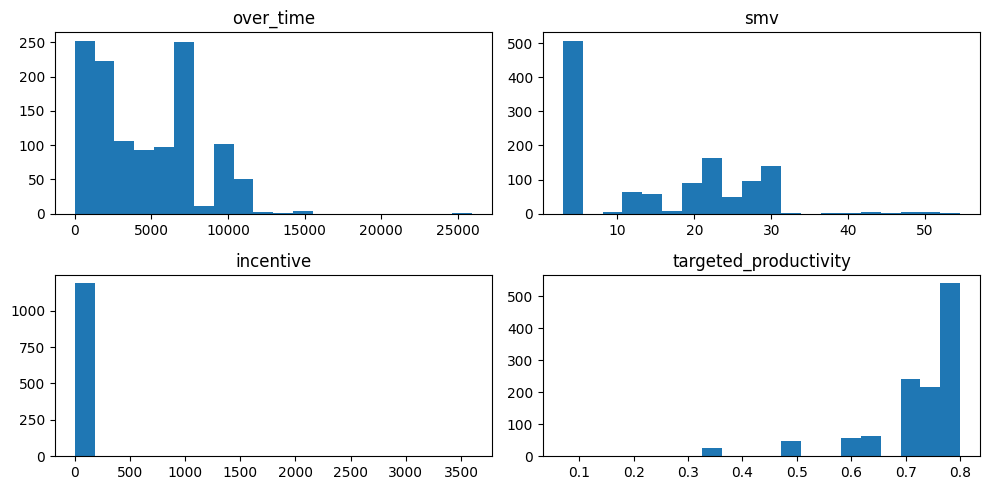

In [312]:
# Define number of rows and columns
num_rows = 2
num_cols = 2

# Define figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 5))

# Create histograms
for i, col in enumerate(cont_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols    
    ax = axes[row_idx, col_idx]
    ax.hist(df_clean[col], bins=20)
    ax.set_title(col)
    
    
fig.tight_layout()
plt.show()

Based on the histograms, we can make the following observations:

- `over_time`: The highest frequency is in the range of (-25.921000000000003, 1296.0] with 252 counts, which means that most of the workers have worked overtime for up to 1296 minutes. The other ranges show lower frequencies, indicating that there were fewer workers who worked overtime for longer durations. The last six ranges have no counts, suggesting that none of the workers worked overtime for durations beyond those ranges.
- `smv`: The highest frequency is in the range of (2.847, 5.483] with 506 counts, which means that most of the workers had an SMV score in this range. The other ranges show lower frequencies, indicating that there were fewer workers with SMV scores outside this range. The last two ranges have no counts, suggesting that none of the workers had an SMV score outside those ranges.
- `incentive`: The majority of the data falls in the range of -3.601 to 180, with a total of 1187 observations, indicating that most incentives are small in value. There are only a few observations above this range, indicating that high-value incentives are relatively rare in the data.
- `targeted_productivity`: The highest frequency is in the range of (0.764, 0.8] with 540 counts, which means that most of the workers achieved a targeted productivity score within this range. The other ranges show lower frequencies, indicating that there were fewer workers who achieved productivity scores outside this range. The last two ranges have no counts, suggesting that none of the workers achieved productivity scores outside those ranges.


### Discrete Variables

Now that we have examined the continuous variables, it's time to delve into the discrete variables in more detail.

The only discrete variable in our dataset is `no_of_workers`.

8     262
58    135
57    134
56    103
59     80
10     60
34     43
9      42
12     37
15     37
55     27
33     24
52     22
31     21
54     19
20     16
18     16
50     10
53      9
51      9
30      9
32      8
60      7
25      6
2       6
35      6
45      6
19      4
38      4
5       3
17      3
7       3
14      2
46      2
39      2
42      2
22      2
27      2
49      1
24      1
48      1
47      1
28      1
44      1
26      1
11      1
21      1
4       1
89      1
16      1
29      1
6       1
Name: no_of_workers, dtype: int64


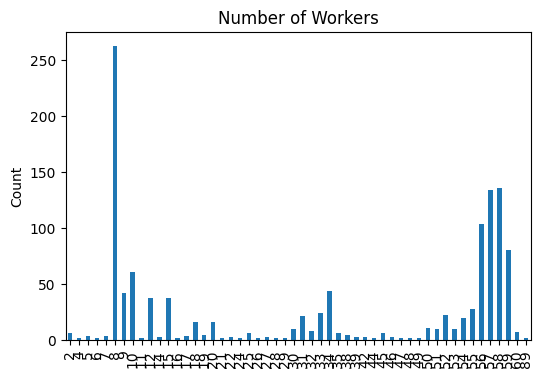

In [313]:
# Distribution count of 'no_of_workers'
print(df_clean['no_of_workers'].value_counts())

# Create a figure with the desired size
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bar plot
df_clean['no_of_workers'].value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_title('Number of Workers')
ax.set_xlabel('')
ax.set_ylabel('Count')

plt.show()

Observations for bar plot on discrete variable:

- `no_of_workers`: The number of workers varies greatly, with the highest number of observations for 8 workers (262 observations), followed by 58 and 57 workers (135 and 134 observations, respectively). There are many different numbers of workers with only a few observations each.


### Categorical Variables

Let's now shift our focus to the categorical columns.

In [314]:
# List of categorical columns (including target column 'productive')
cat_cols = ['quarter', 'department', 'day', 'team', 'productive']

for col in cat_cols:
    print(col)
    print(df_clean[col].value_counts())
    print()

quarter
Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

department
sweing       691
finishing    506
Name: department, dtype: int64

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

productive
True     895
False    302
Name: productive, dtype: int64



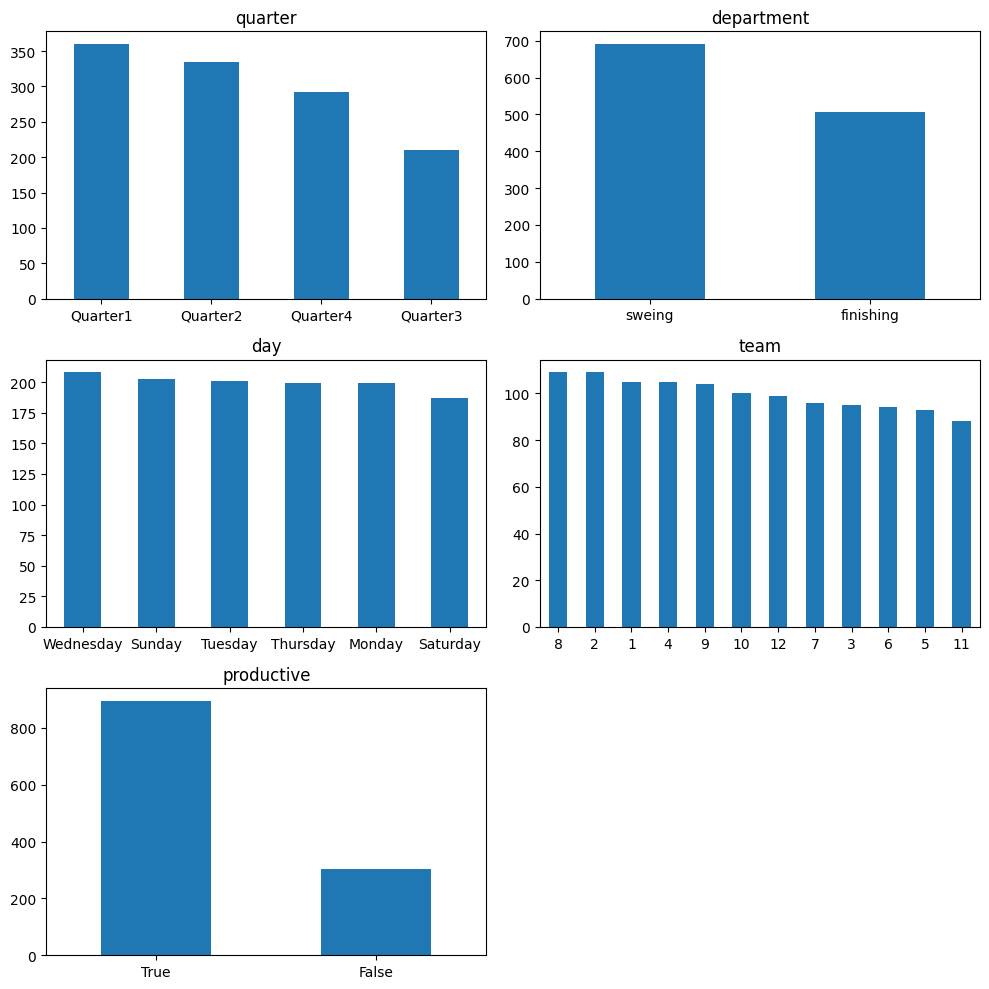

In [315]:
# Create bar plot for 'cat_cols'
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df_clean[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', labelrotation=0)
    
# Remove unused axes
for j in range(len(cat_cols), len(axes.flat)):
    fig.delaxes(axes.flat[j])
    

plt.tight_layout()
plt.show()

Based on the bar plots, we can make the following observations:

- `Quarter`: The maximum number of records are from Quarter1, followed by Quarter2, Quarter4, and Quarter3.
- `Department`: The number of records from the Sewing department is higher than that of the Finishing department.
- `Day`: The number of records is almost evenly distributed across all days of the week, with Wednesday having the maximum records and Saturday having the least.
- `team`: Teams 8 and 2 have the highest number of observations with 109 each, followed by team 1 with 105 observations. Team 11 has the lowest number of observations with 88.
- `Productive`: The majority of records indicate that the factory was productive (895 records), while a relatively smaller number of records indicate non-productivity (302 records).

## Feature Transformation

After a thorough analysis of the dataset, we are almost ready to start building the decision tree model. However, since `scikit-learn` only supports numerical data, we need to convert some categorical columns to numerical format for use in our model.

We can use `make_column_transformer` with `OneHotEncoder` and `OrdinalEncoder` to transform our columns, enabling us to efficiently encode and integrate them into our dataset.

In [316]:
df_clean.head()

,quarter,day,department,team,no_of_workers,over_time,smv,incentive,targeted_productivity,productive
0,Quarter1,Thursday,sweing,8,59,7080.0,26.16,98.0,0.80,True
1,Quarter1,Thursday,finishing,1,8,960.0,3.94,0.0,0.75,True
2,Quarter1,Thursday,sweing,11,30,3660.0,11.41,50.0,0.80,True
3,Quarter1,Thursday,sweing,12,30,3660.0,11.41,50.0,0.80,True
4,Quarter1,Thursday,sweing,6,56,1920.0,25.90,50.0,0.80,True


In [317]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Create column transformer
col_trans = make_column_transformer(
        (OneHotEncoder(), ['department', 'day', 'team']),
        (OrdinalEncoder(dtype=np.int64), ['quarter']),
        remainder='passthrough',
        verbose_feature_names_out=False)

# Fit the encoder to the entire dataset
trans_df = col_trans.fit_transform(df_clean)

# Create dataframe
df_final = pd.DataFrame(trans_df, columns=col_trans.get_feature_names_out())
df_final.head()

,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,team_1,team_2,...,team_10,team_11,team_12,quarter,no_of_workers,over_time,smv,incentive,targeted_productivity,productive
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,59,7080.0,26.16,98.0,0.8,True
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,8,960.0,3.94,0.0,0.75,True
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0,30,3660.0,11.41,50.0,0.8,True
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,30,3660.0,11.41,50.0,0.8,True
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,56,1920.0,25.9,50.0,0.8,True


In [318]:
df_final['quarter'].value_counts()

0    360
1    335
3    292
2    210
Name: quarter, dtype: int64

In [319]:
df_clean['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

In [322]:
df_final.columns

Index(['department_finishing', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4', 'team_5',
       'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11', 'team_12',
       'quarter', 'no_of_workers', 'over_time', 'smv', 'incentive',
       'targeted_productivity', 'productive'],
      dtype='object')

In [320]:
df_final.quarter.value_counts()

0    360
1    335
3    292
2    210
Name: quarter, dtype: int64

In [323]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Create column transformer
col_trans = ColumnTransformer(
    transformers=[
        ('dept_sweing', OrdinalEncoder(categories=[['finishing', 'sweing']]), ['department']),
    ], 
    remainder='passthrough')

# Fit the transformer to the entire dataset
trans_df = col_trans.fit_transform(df_clean)

# Create dataframe
df_final = pd.DataFrame(trans_df, columns=['dept_sweing'] + list(df_clean.columns[1:]))
df_final.head()


,dept_sweing,day,department,team,no_of_workers,over_time,smv,incentive,targeted_productivity,productive
0,1.0,Quarter1,Thursday,8,59,7080.0,26.16,98.0,0.8,True
1,0.0,Quarter1,Thursday,1,8,960.0,3.94,0.0,0.75,True
2,1.0,Quarter1,Thursday,11,30,3660.0,11.41,50.0,0.8,True
3,1.0,Quarter1,Thursday,12,30,3660.0,11.41,50.0,0.8,True
4,1.0,Quarter1,Thursday,6,56,1920.0,25.9,50.0,0.8,True
